# Explore your YouTube History

## Prepare data

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from preparation import prepare_data
from select_by_date_interval import select_by_date_interval
from plotting import h_bar_plot, get_videos_per_h, month_bar_plot, get_videos_per_month, stacked_bar_with_labels

In [7]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger
style.use('seaborn') # apply style for your plot. Hard to read letters in pie charts if style isn't suitable

In [25]:
PATH = "data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)

start_date = "2023-01-01"
# end_date = "2022-11-01"
df = select_by_date_interval(df, start=start_date)
# df = df.loc[df["app"] == "YouTube Music"] # if you wanna work only with YT Music data
df

,video_title,channel_name,time,app
1,SHUM,Go_A,2023-07-07 11:09:28.039000+03:00,YouTube
2,♪ Diggy Diggy Hole,YOGSCAST Lewis & Simon,2023-07-07 11:05:18.921000+03:00,YouTube
3,Diggy Diggy Hole - Clamavi De Profundis,Clamavi De Profundis,2023-07-07 11:02:51.792000+03:00,YouTube
4,LADY GAGA - BLOODY MARY (Tik Tok Remix | Speed...,GANGSTER CITY,2023-07-07 10:59:55.926000+03:00,YouTube
5,Lady Gaga - Bloody Mary (Official Audio),LadyGagaVEVO,2023-07-07 10:55:55.221000+03:00,YouTube
...,...,...,...,...
8607,Assassin's Creed Odyssey - Before You Buy,gameranx,2023-01-01 10:02:05.355000+02:00,YouTube
8608,#Ukraine's spy chief tells ABC News there will...,ABC News,2023-01-01 09:44:58.841000+02:00,YouTube
8609,Russian missile zooms over Kyiv before being s...,The Sun,2023-01-01 09:43:07.927000+02:00,YouTube
8610,YARMAK FT. TOF - МОЯ КРАЇНА,Yarmak Music,2023-01-01 00:07:14.838000+02:00,YouTube


# Figures that require all the available data

### Discover at what hours you watch a particular channel 

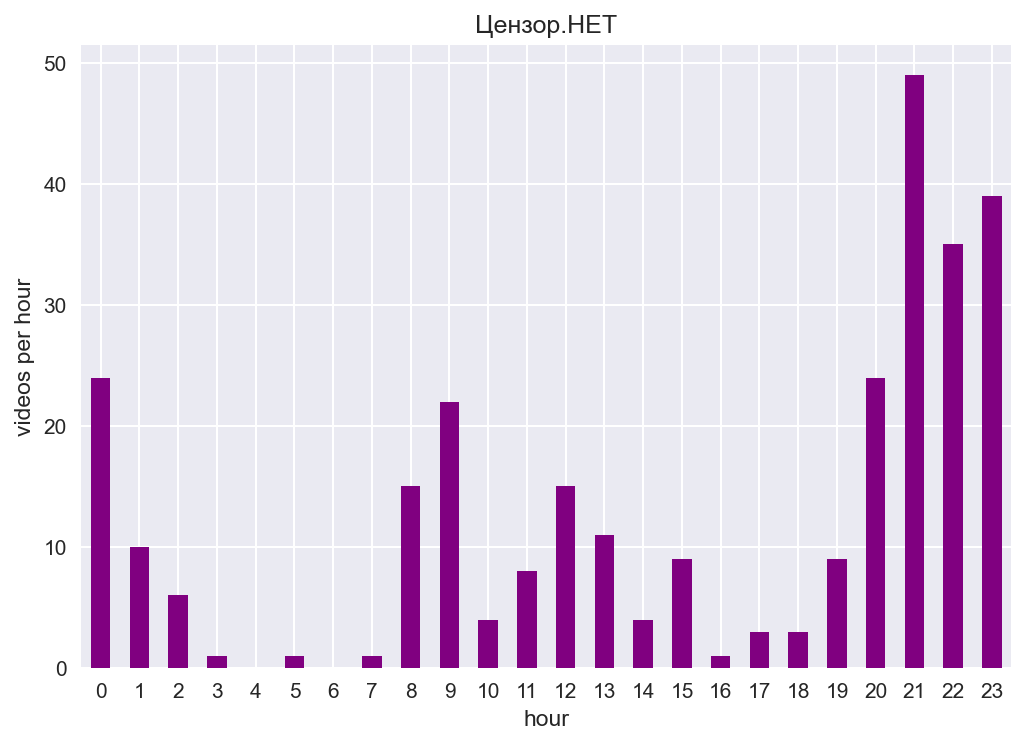

In [9]:
channel_name_to_look = "Цензор.НЕТ"
h_bar_plot(df, channel_name_to_look)

### Change in use of a particular channel over months (Use all data for this!)

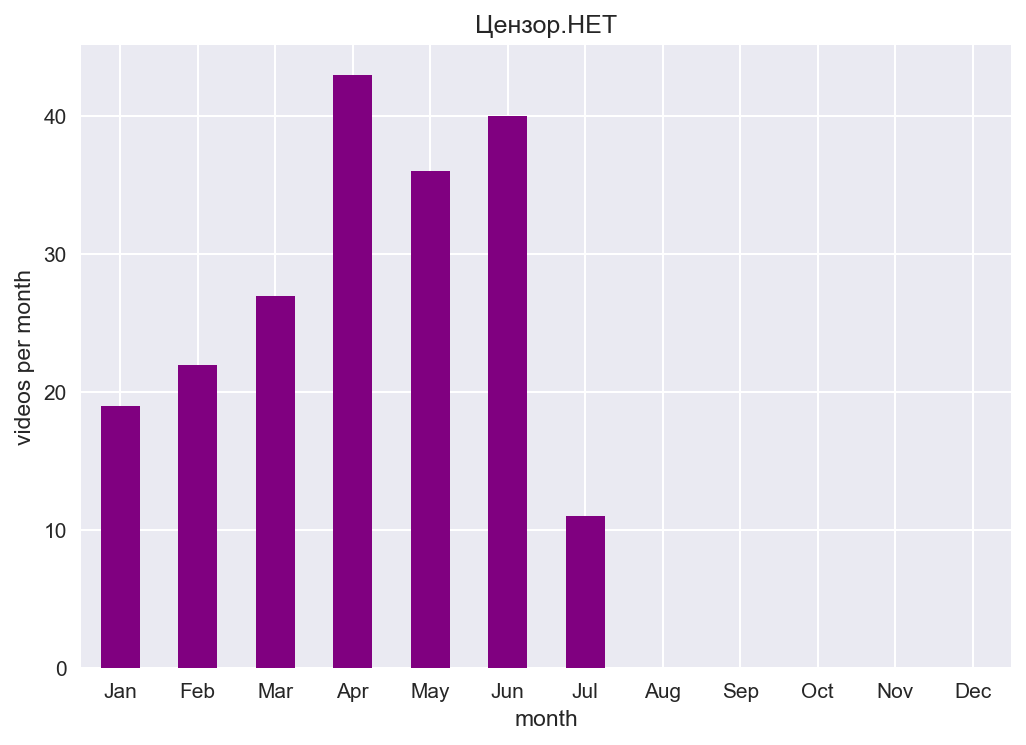

In [26]:
channel_name = "Цензор.НЕТ"
month_bar_plot(df, channel_name)

### See how many videos you watched/listened to in YT and YT music over months

In [27]:
yt_df = df.loc[df["app"] == "YouTube"]
yt = get_videos_per_month(yt_df)
music_df = df.loc[df["app"] == "YouTube Music"]
music = get_videos_per_month(music_df)

months = yt.index.tolist()
yt_use_progress = pd.DataFrame({"YT": yt, "YT Music": music}, index=months) 

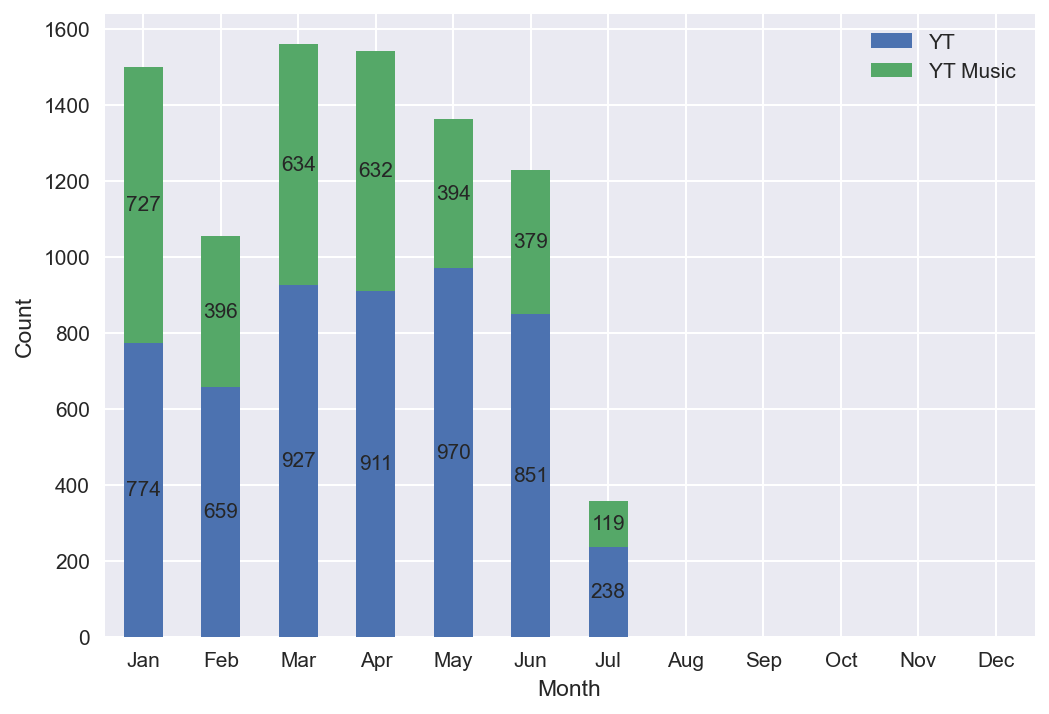

In [28]:
stacked_bar_with_labels(yt_use_progress[["YT", "YT Music"]])

### See how your use of YT music changed in percentages over months

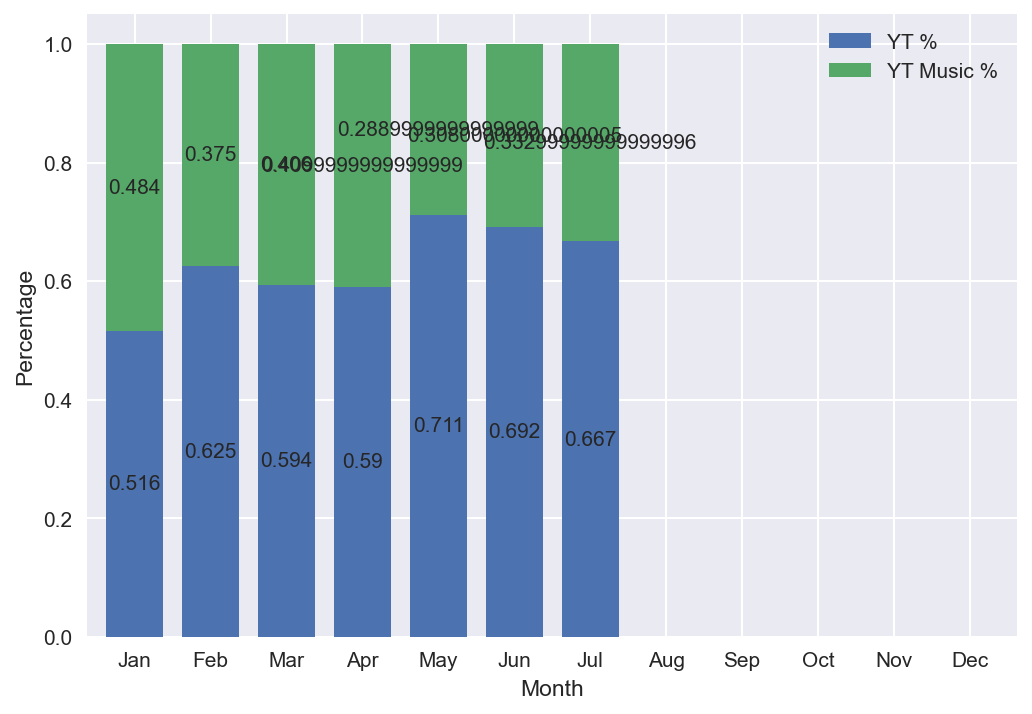

In [42]:
yt_use_progress["Total"] = yt_use_progress["YT"] + yt_use_progress["YT Music"]
yt_use_progress["YT %"] = yt_use_progress["YT"] / yt_use_progress["Total"]
yt_use_progress["YT Music %"] = yt_use_progress["YT Music"] / yt_use_progress["Total"]
yt_use_progress = yt_use_progress.round(3) # round all floats in df to 3 places

stacked_bar_with_labels(yt_use_progress[["YT %", "YT Music %"]], float_num=True, bar_width=0.75)

# Plots that don't need all the data

### Count on how many videos you clicked per channel

In [43]:
counts = df["channel_name"].value_counts()
counts

Харцизи                     272
SadSvit                     216
Цензор.НЕТ                  198
Grandma's Smuzi             191
Riffmaster                  173
                           ... 
ProgrammingKnowledge          1
VMware Cloud Native Apps      1
School of Devops              1
Хмаринка Science              1
Oleksandr Ponomariov          1
Name: channel_name, Length: 1466, dtype: Int64

### Break into categories

In [44]:
bins = [0, 1, 5, 10, 20, 50, np.inf]
names = ['1', '2-5', '6-10', '11-20', '21-50', ">50"]

intervals = pd.cut(counts, bins, labels=names)
# Use reindex here, so values get ordered by labels not count
videos_per_interval_count = intervals.value_counts().reindex(names)
videos_per_interval_percentage = videos_per_interval_count/len(intervals)
videos_per_interval_count, videos_per_interval_percentage

(1        876
 2-5      338
 6-10      89
 11-20     71
 21-50     66
 >50       26
 Name: channel_name, dtype: int64,
 1        0.597544
 2-5      0.230559
 6-10     0.060709
 11-20    0.048431
 21-50    0.045020
 >50      0.017735
 Name: channel_name, dtype: float64)

### Plot percentage of categories

<AxesSubplot:title={'center':'Videos per channel'}>

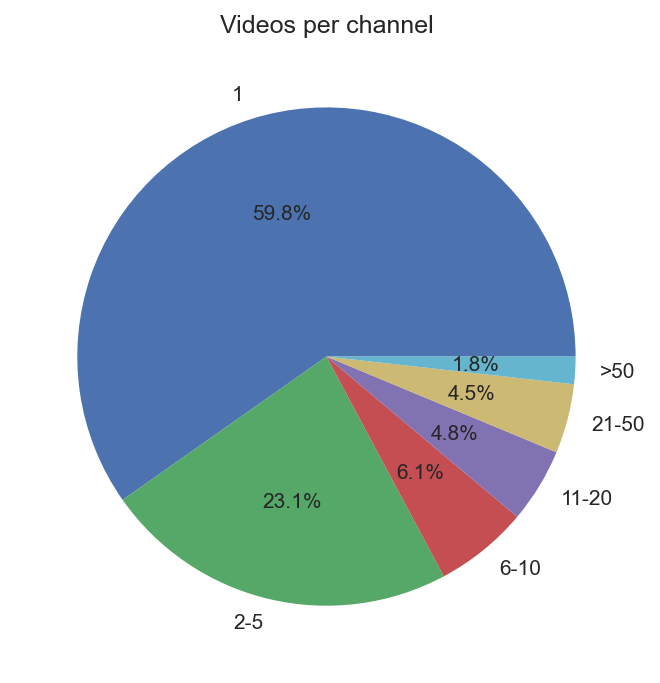

In [45]:
videos_per_interval_percentage.plot.pie(autopct='%1.1f%%',
                                        title="Videos per channel",
                                        ylabel="")

### Plot n most watched channels

2837

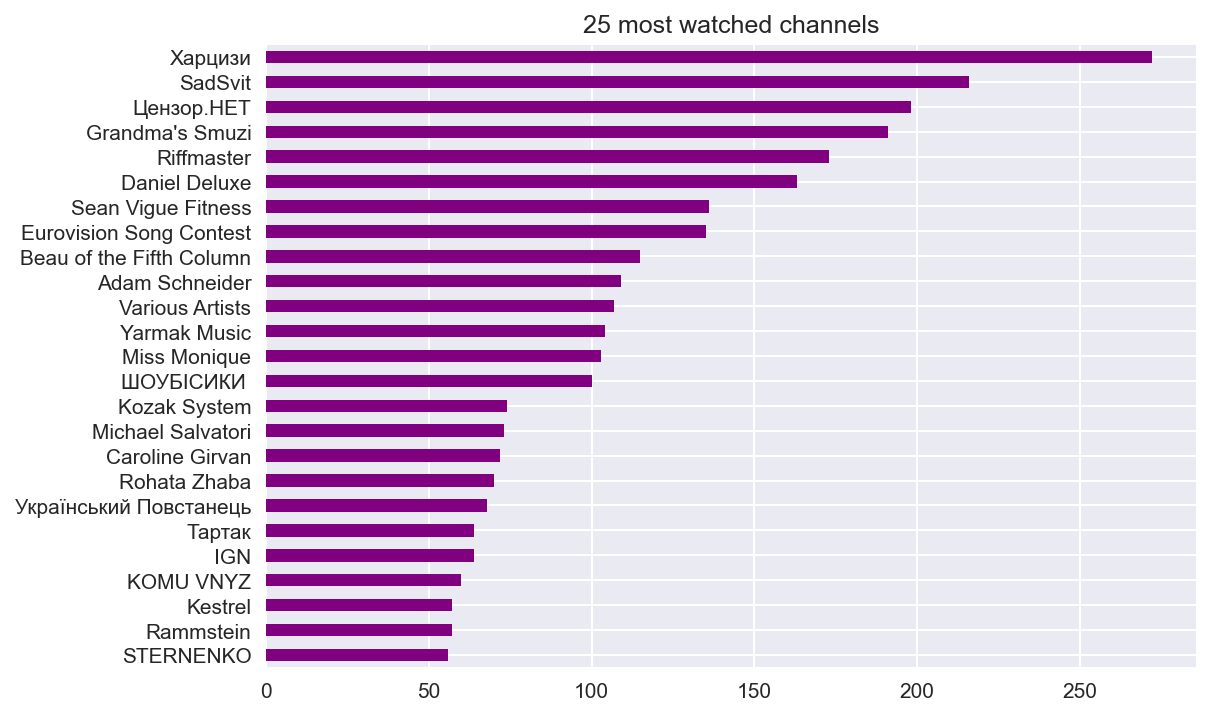

In [46]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()
sum(top_n_channels)

### Count on how many videos you clicked per hour

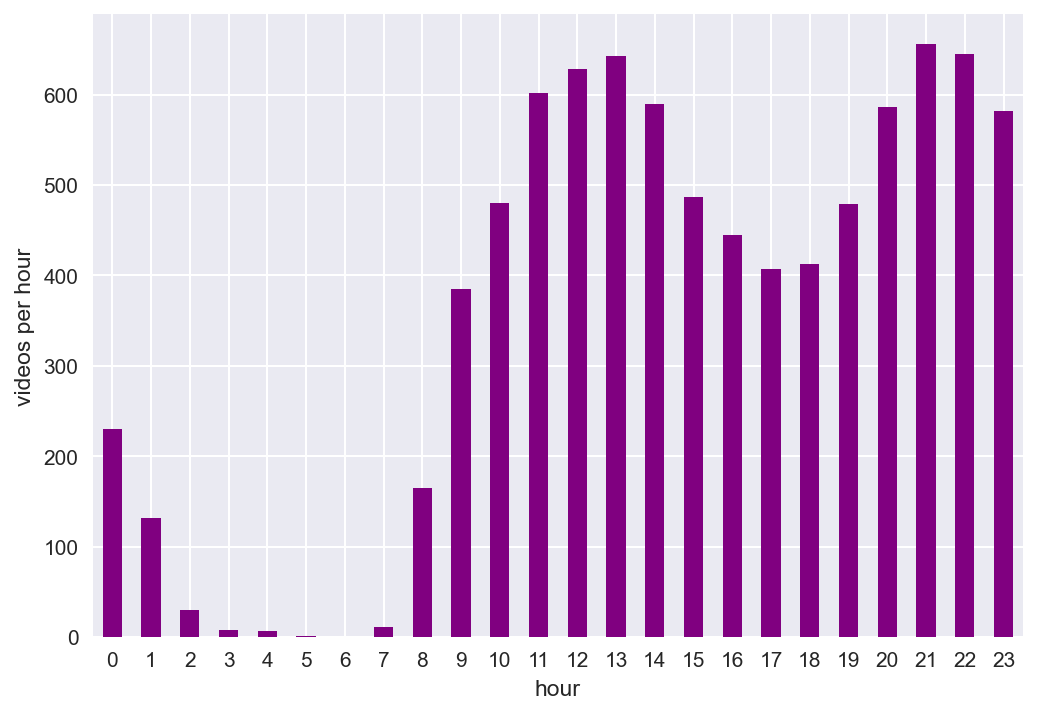

In [47]:
h_bar_plot(df)

### Plot videos count per hour for several channels

In [48]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels[:10]

['Харцизи',
 'SadSvit',
 'Цензор.НЕТ',
 "Grandma's Smuzi",
 'Riffmaster',
 'Daniel Deluxe',
 'Sean Vigue Fitness',
 'Eurovision Song Contest',
 'Beau of the Fifth Column',
 'Adam Schneider']

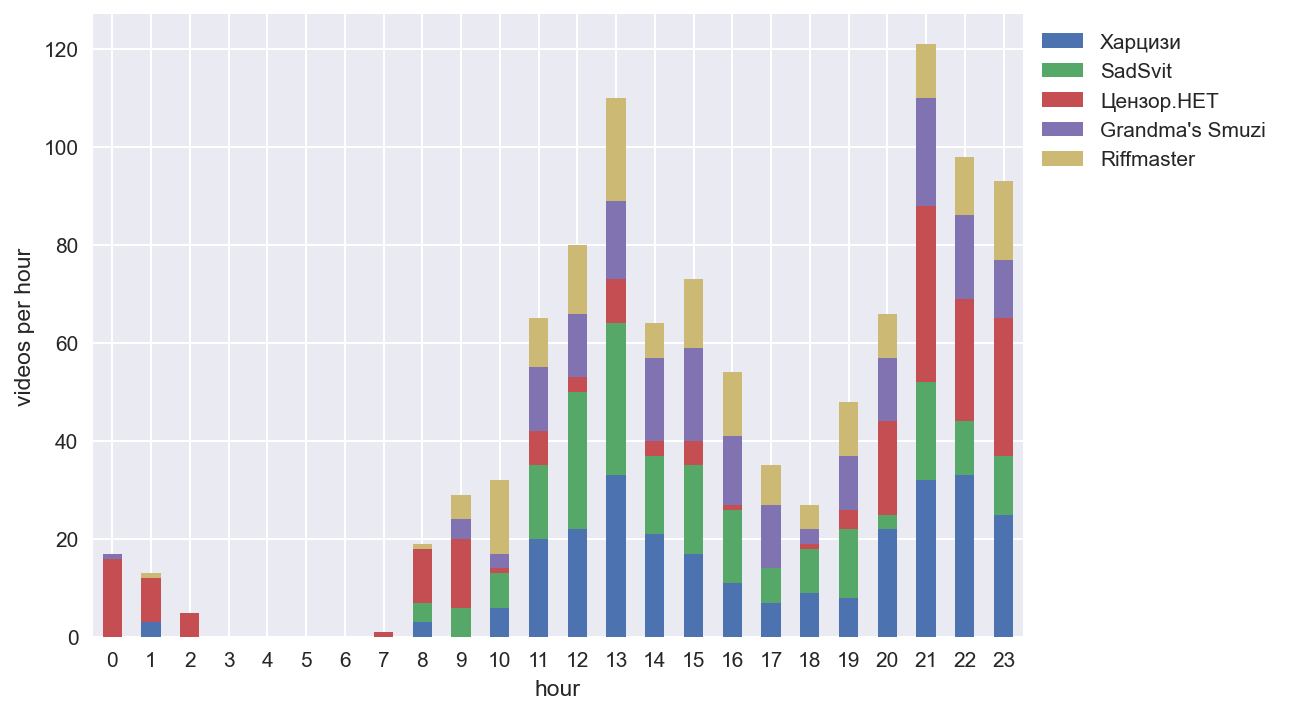

In [49]:
start_point = 0
interval = 5
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

### Count how many videos you click per day of week

<AxesSubplot:>

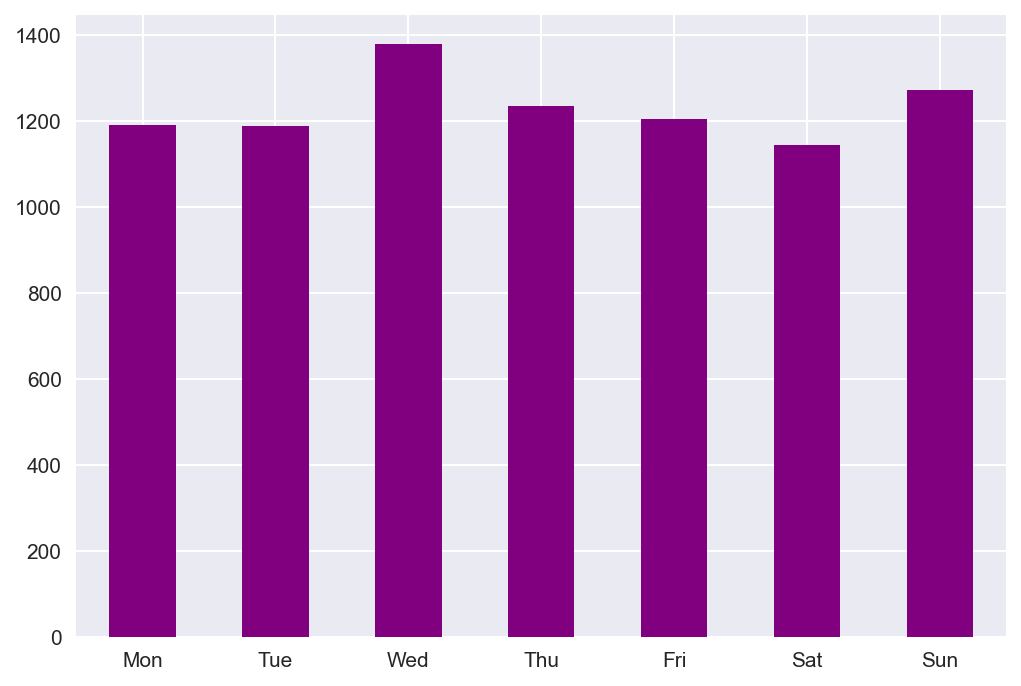

In [50]:
def count_videos_per_weekday(df):
    df['weekday'] = df['time'].dt.strftime('%a')
    total = len(df["weekday"])
    str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return df["weekday"].value_counts()[str_week_days] # sort with custom index

videos_per_weekday = count_videos_per_weekday(df)
videos_per_weekday.plot.bar(color="purple", rot=0)

# Let's use our sample from classification to see our categories

In [51]:
df2 = pd.read_csv('data/samples/labeled_sample_1610_elem.csv', index_col=0)
df2.tail(3)

,video_title,channel_name,app,category,time,combined,combined_preproc
1607,Мавка,Authentix,YouTube,Music,2023-04-04 12:57:54.594000+03:00,Мавка Authentix,authentix
1608,Drinker's Chasers - ANOTHER Rey Skywalker Movie?!,Critical Drinker After Hours,YouTube,Rec,2023-04-04 14:12:17.193000+03:00,Drinker's Chasers - ANOTHER Rey Skywalker Movi...,drinkers chasers another rey skywalker movie c...
1609,Ліхтар,Rohata Zhaba,YouTube,Music,2023-04-04 14:25:11.177000+03:00,Ліхтар Rohata Zhaba,rohata zhaba


### Count how many videos you have per category

In [52]:
counts = df2["category"].value_counts()
counts

Music       994
Politics    244
Rec         218
Studies     123
Sport        31
Name: category, dtype: int64

<AxesSubplot:title={'center':'Category percentage'}>

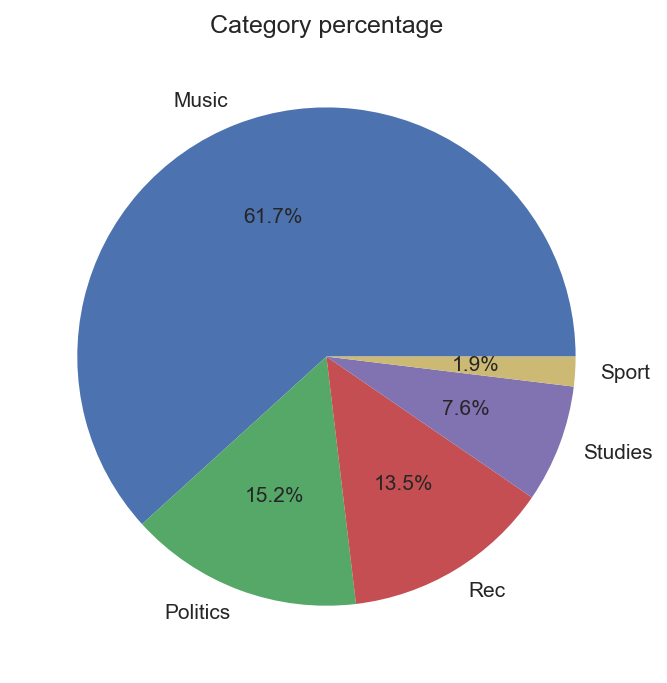

In [57]:
counts.plot.pie(autopct='%1.1f%%',
                title="Category percentage",
                ylabel="")

#    ####___UNFINISHED SUBSET-COMPARISON CODE BELOW___####

# Compare two subsets

In [23]:
# start_date = "2022-09-01"
# end_date = "2022-09-30"
# df = select_by_date_interval(df, start=start_date)
# df = df.loc[df["app"] == "YouTube Music"] # if you wanna work only with YT Music data
interval_1_start = "2022-09-01"
interval_1_end = "2022-10-01"
first_subset = select_by_date_interval(df, start=interval_1_start, end=interval_1_end)

interval_2_start = "2022-10-01"
interval_2_end = "2022-11-01"
second_subset = select_by_date_interval(df, start=interval_2_start, end=interval_2_end)

### See how you used YT per day of week in first subset vs second subset

In [24]:
weekday_compare_subsets = pd.DataFrame({"first_subset": count_videos_per_weekday(first_subset),
                                        "second_subset": count_videos_per_weekday(second_subset)})
weekday_compare_subsets.plot.bar(rot=0)

AttributeError: Can only use .dt accessor with datetimelike values

### Compare how you used YT daily

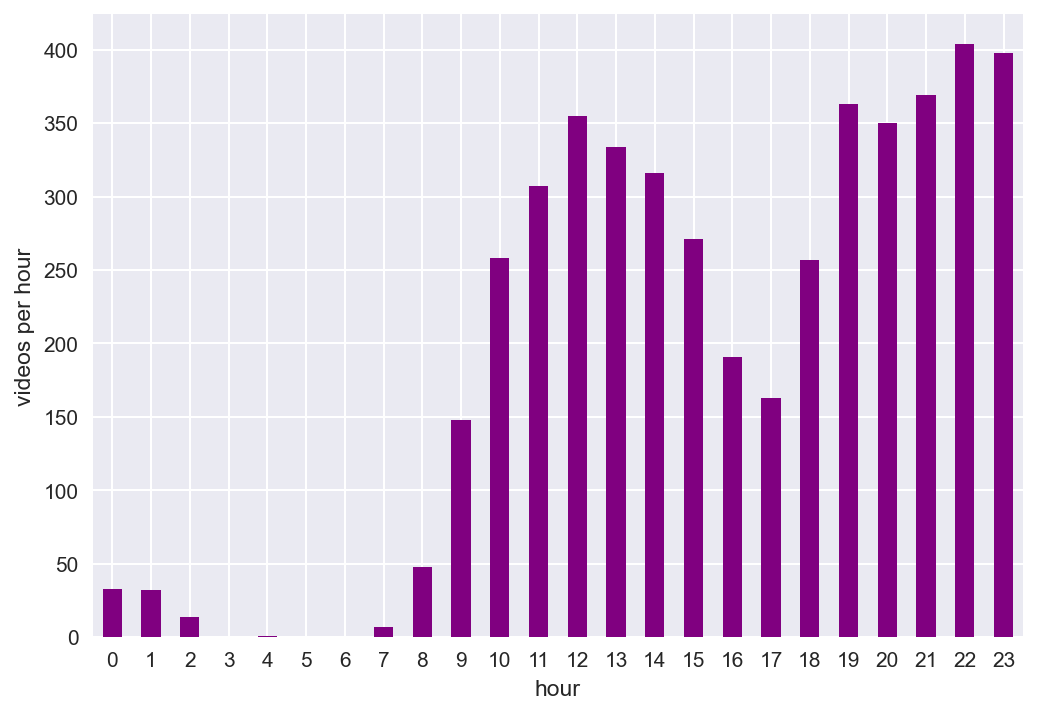

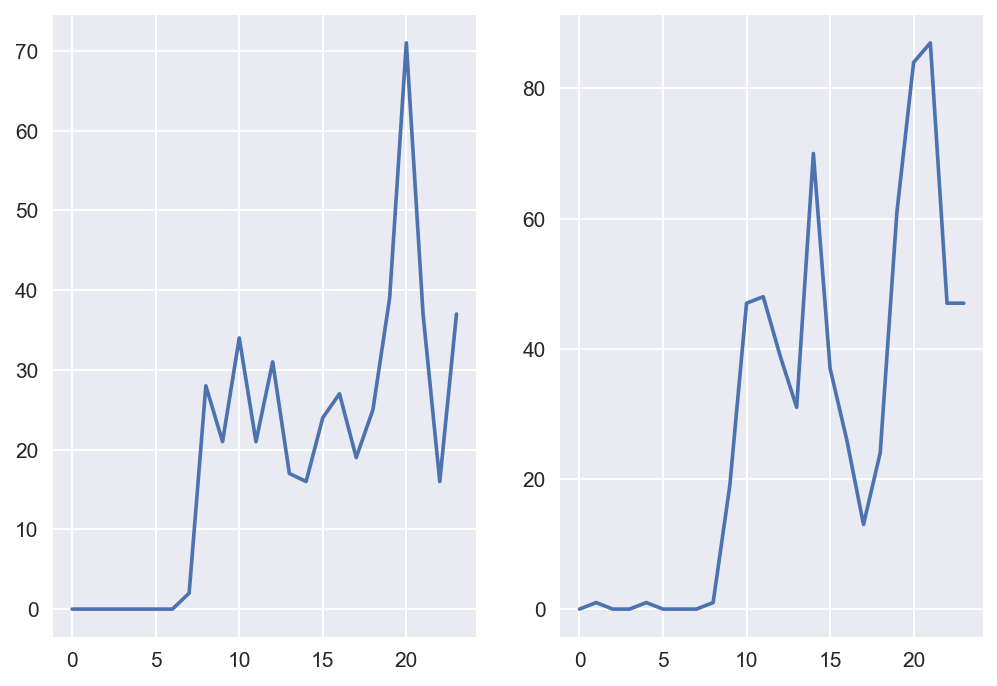

In [ ]:
h_bar_plot(df)
# should i normalize these series to 0 and 1?
daily_1 = get_videos_per_h(first_subset)
daily_2 = get_videos_per_h(second_subset)
daily_1

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(daily_1)
axes[1].plot(daily_2)